In [90]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

apply_mask = False

full_length = True
# or
paper_length = False

trial = 0

t_full = (np.arange(1,15)) / 25
t_full = t_full - t_full[0] # reset t to start at 0

print(t_full)
diff1 = [1,14.5,15.3,15.8,16.9,23.9,10.7,17.3,19,20.1,16.2,9.9,8.4,4.5]
diff2 = [2.4,9.6,10.7,16.3,20.7,26.5,36.3,51.1,112.6,44,32.6,13.9,14.2,18]
diff3 = [2.5,6.2,10.1,6.9,16.3,21.2,29.4,41.2,104.3,63.7,47.5,14.9,21.8,20.9]
diff4 = [7,11,4.5,8.9,24.6,34.2,3.2,3.9,18.9]
diff5 = [6.9,23.3,14.8,24.1,8.1,13.1,9.7,14.1,24.6]
diff6 = [6.8,15.4,7.1,11.8,27.2,30.9,29.8,41.3,108.1]
diff7 = [5.2,7.1,7.6,7.6,9.1,41.6,89.3,50.8,21.6]

le_found = [3.50,9.73,9.07,7.88,-0.248,6.3,4.38]
le_err = [0.02,0.03,0.04,0.005,0.04,0.03,0.1,0.06,0.05,0.05]
len_found = [10,9,8,6,8,8,4]

diffs = [diff1, diff2, diff3, diff4, diff5, diff6, diff7]
labels = ['trial1_2', 'trial2_3', 'trial1_3', 'trial1_4', 'trial2_4', 'trail3_4', 'trial1_5']
d0s = [diff[0] for diff in diffs]

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52]


In [91]:
# Define the exponential function to fit
def exponential_func1(x, le, d0):
    return d0 * np.exp(le * x)


def fit_exponential1(t, diff, d0, le0):
    
    # Fit the exponential function to the data
    # popt, pcov = curve_fit(exponential_func1, t, diff, bounds=([-np.inf, d0], [np.inf, d0 + 1e-7])) # fit with d0 fixed
    popt, pcov = curve_fit(exponential_func1, t, diff, p0=[le0, d0]) # fit with d0 and le0 guesses
    

    # Calculate the chi-squared value
    residuals = diff - exponential_func1(t, *popt)
    chi_squared = np.sum(residuals**2 / exponential_func1(t, *popt))

    # Calculate the errors on the fitted parameters
    perr = np.sqrt(np.diag(pcov))

    # Calculate the reduced chi-squared value
    n = len(diff) # number of data points
    k = len(popt) # number of fitted parameters
    red_chi_squared = chi_squared / (n - k)

    return popt, perr, chi_squared, red_chi_squared

In [92]:
if full_length:
    t = t_full[:len(diffs[trial])]
    diff = diffs[trial]
elif paper_length:
    t = t_full[:len_found[trial]]
    diff = diffs[trial][:len_found[trial]]    
    
d0 = d0s[trial]
le0 = le_found[trial]

if apply_mask:
    print("mask applied !")
    mask = [True for i in range(len(diff3))]

    for i in ([3]+list(range(10,(len(diff3))))):
        mask[i] = False
        
    diff = np.array(diff3)[mask]
    t = np.array(t[:len(diff3)])[mask]

full length applied !
paper used 10 points: le = 3.5 +/- 0.02
points used: (0, 10), red_chi_squared = 2.1920780289200192, le = 1.785645498627674 +/- 0.9826019567926857, d0 = 11.000293152136468 +/- 2.7095099126602276, chi_squared = 17.536624231360154


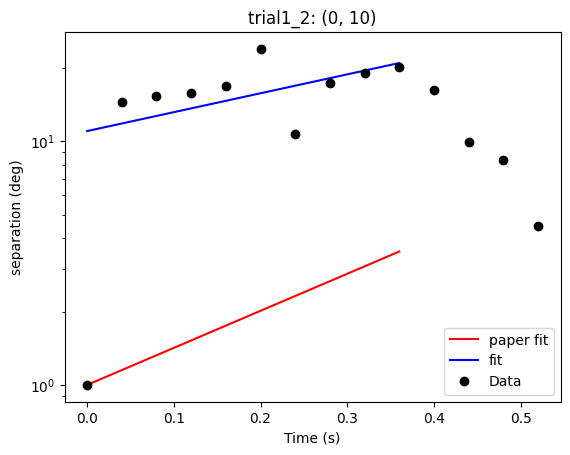

points used: (1, 11), red_chi_squared = 0.7634595942702038, le = 0.4584977447358144 +/- 0.5859136917137062, d0 = 15.604711509369569 +/- 2.0445166782803543, chi_squared = 6.107676754161631


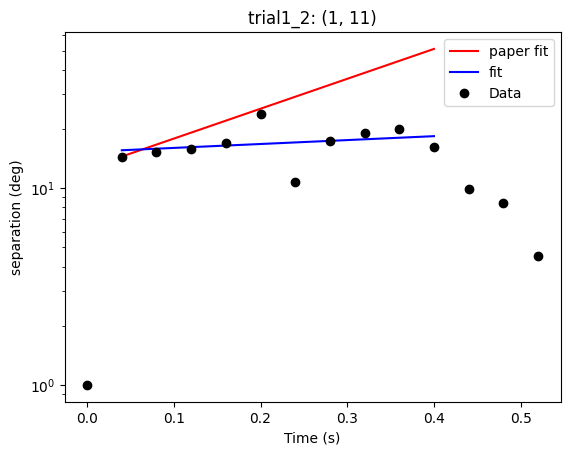

points used: (2, 12), red_chi_squared = 1.1446524737144848, le = -0.3186994949040573 +/- 0.7225427248515061, d0 = 17.474158396699075 +/- 2.6060107015466643, chi_squared = 9.157219789715878


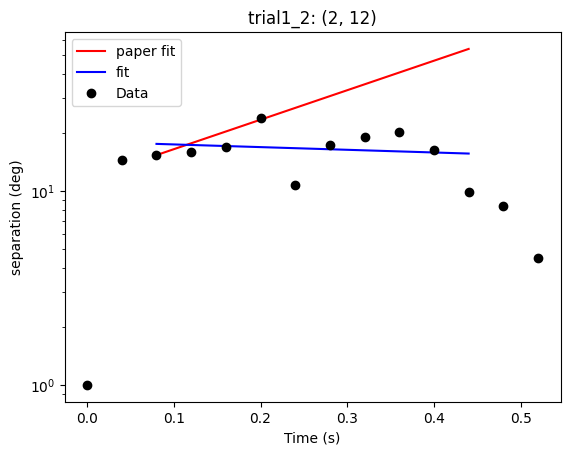

points used: (3, 13), red_chi_squared = 1.3725756857702054, le = -1.0600281067224262 +/- 0.8143326308503568, d0 = 19.021863200034826 +/- 2.9367529205197247, chi_squared = 10.980605486161643


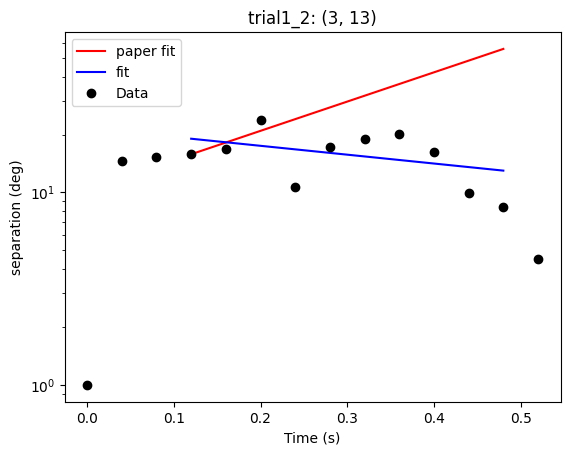

points used: (4, 14), red_chi_squared = 1.6801264490669015, le = -2.0323565004639046 +/- 0.9535508997044443, d0 = 20.697978572760373 +/- 3.3109825691017023, chi_squared = 13.441011592535212


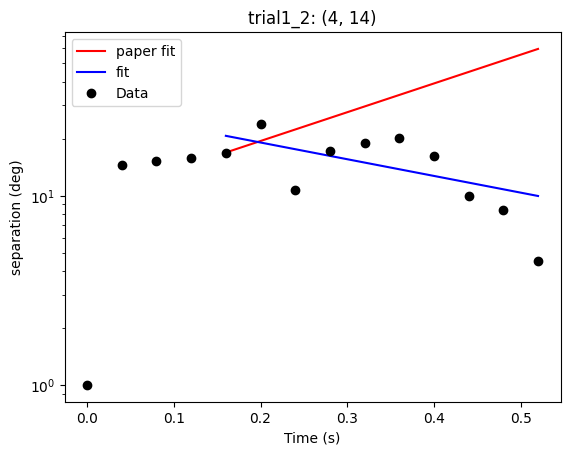

In [93]:
%matplotlib inline
if paper_length: print("paper length applied !")
elif full_length: print("full length applied !")
if apply_mask: print("mask applied !")

# plotting the data
print(f'paper used {len_found[trial]} points: le = {le_found[trial]} +/- {le_err[trial]}')

for start in range(0, len(diff) - len_found[trial] + 1):
    
    popt, perr, chi_squared, red_chi_squared = fit_exponential1(t[start:start + len_found[trial]]-t[start], diff[start:start + len_found[trial]], diff[start], le0)
    
    print(f'points used: {(start, start + len_found[trial])}, red_chi_squared = {red_chi_squared}, le = {popt[0]} +/- {perr[0]}, d0 = {popt[1]} +/- {perr[1]}, chi_squared = {chi_squared}')
    
    
    plt.plot(t[start:start + len_found[trial]],exponential_func1(t[start:start + len_found[trial]]-t[start],le_found[trial],diff[start]), 'r-', label='paper fit')
    plt.plot(t[start:start + len_found[trial]],exponential_func1(t[start:start + len_found[trial]]-t[start],popt[0],popt[1]), 'b-', label='fit')
    plt.plot(t, diff, 'ko', label='Data')
    plt.xlabel('Time (s)')
    plt.ylabel('separation (deg)')
    plt.title(f'{labels[trial]}: {(start, start + len_found[trial])}')
    plt.yscale('log')
    plt.legend()
    plt.show()